# INF8111 - Fouille de données


## TP1 AUTOMNE 2024 - Préparation de données




## Introduction et objectifs

### Importation des différents modules

In [36]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install plotly
!pip install requests
!pip install shap

In [37]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import linear_model
from sklearn.linear_model import Ridge
import shap

### Téléchargement des données

In [38]:
import requests
response = requests.get('https://docs.google.com/spreadsheets/d/1caaR9pT24GNmq3rDQpMiIMJrmiTGarbs/export?format=csv&gid=1150341366')
assert response.status_code == 200, 'Wrong status code'
# convert the csv to a pandas dataframe
with open('data.csv', 'w') as f:
    f.write(response.text)

df = pd.read_csv('data.csv')

Le but de ce notebook est d'effectuer le prétraitement du dataset [HousePricePrediction](https://docs.google.com/spreadsheets/d/1caaR9pT24GNmq3rDQpMiIMJrmiTGarbs/edit#gid=1150341366) qui pourra être par la suite être utilisé pour entraîner un modèle de prédiction de prix de maisons.

## Préparation des données

Plusieurs étapes sont nécessaires pour préparer un dataset pour la fouille des données
- **Nettoyage des données** :
    - Suppression des attributs inutiles
    - Gestion des valeurs manquantes
    - Gestion des valeurs aberrantes
- **Transformation des données** :
    - Encodage des données
    - Normalisation des données
- **Sélection des attributs** :
    - Suppression des attributs les plus fortement corrélés

## Sommaire

1. [Première observation des données](#1.-Première-observation-des-donnees)
2. [Nettoyage des données](#2.-Nettoyage-des-données)
   1. [Suppression des attributs inutiles](#2.1.-Suppression-des-attributs-inutiles)
   2. [Gestion des valeurs manquantes](#2.2.-Gestion-des-valeurs-manquantes)
   3. [Détection des valeurs aberrantes](#2.3.-Détection-des-valeurs-aberrantes)
3. [Transformation des données](#3.-Transformation-des-données)
   1. [Encodage des attributs de type `object`](#3.1.-Encodage-des-attributs-de-type-object)
   2. [Normalisation des données](#3.2.-Normalisation-des-données)
4. [Sélection des attributs](#4.-Sélection-des-variables)
   1. [Suppression des attributs corrélées](#4.1.-Suppression-des-variables-corrélées)
5. [Récapitulatif des procédés](#5.-Récapitulatif-des-prétraitements)
6. [Entrainement d'un modèle de régression linéaire](#6.-Récapitulatif-des-prétraitements)
    1. [Rappel du concept](#6.1.-Rappel-concept)
    2. [Application](#6.2.-Application)
    3. [Sélection des attributs importants](#6.3.-Sélection-des-attributs-importants)
7. [Méthode des écarts interquartiles ou IRQ](#7.-Récapitulatif-des-prétraitements)

## 1. Exploration des données (5 points)

Nous vous avons fourni le fichier *data.csv* avec l'exécution de la deuxième cellule. Il contient l'ensemble des données. Chaque ligne contient les données d'une vente. La description des attributs du dataset est la suivante:

| # | Feature Name | Description |
|---|--------------|-------------|
| 1 | Id           | Numéro de vente / To count the records. |
| 2 | MSSubClass   | Type de logement / Identifies the type of dwelling involved in the sale. |
| 3 | MSZoning     | Zonage / Identifies the general zoning classification of the sale. |
| 4 | LotArea      | Superficie du logement / Lot size in square feet. |
| 5 | LotConfig    | Configuration du logement / Configuration of the lot |
| 6 | BldgType     | Type de logement / Type of dwelling |
| 7 | OverallCond  | Etat général / Rates the overall condition of the house |
| 8 | YearBuilt    | Année de contruction / Original construction year |
| 9 | YearRemodAdd | Année de rénovation / Remodel date (same as construction date if no remodeling or additions). |
| 10| Exterior1st  | Type de revêtement extérieur / Exterior covering on house |
| 11| BsmtFinSF2   | Surface de vie / Type 2 finished square feet. |
| 12| TotalBsmtSF  | Surface totale de la base / Total square feet of basement area |
| 13| SalePrice    | Prix de vente à prédire / To be predicted |

On visualise le dataset pour avoir une idée de ce qu'il contient et des prétraitements à effectuer.

### 1.1 - Question 1 (2.5 points)

**Combien d'éléments contient le dataset ? Quelles sont les types des attributs du dataset ?**

In [39]:
#TODO
print(f"Nombre d'éléments : {df.size}")
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Types des attributs : \n{df.dtypes}")

Nombre d'éléments : 37947
Nombre de lignes : 2919
Types des attributs : 
Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object


### 1.2 - Question 2 (2.5 points)

**Quelles sont les valeurs uniques des attributs de type `object` ?**

In [40]:
#TODO
object_type_attr = df.select_dtypes(include=['object'])
for col in object_type_attr.columns:
    print(f"Valeurs uniques pour l'attribut {col} : {df[col].unique()}")               

Valeurs uniques pour l'attribut MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Valeurs uniques pour l'attribut LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Valeurs uniques pour l'attribut BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Valeurs uniques pour l'attribut Exterior1st : ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' nan]


## 2. Nettoyage des données (30 points)

### 2.1 Suppression des attributs inutiles

### 2.1.1 - Question 3 (5 points)

**Pourquoi on peut supprimer l'attribut `Id` dans le cas de ce TP? Effectuez cette suppression.**

In [41]:
#TODO
print("Dans le cas de ce TP, l'attribut Id peut être supprimé car il n'a aucune influence directe sur les autres variables ou sur le résultat final. Cet attribut est purement un identifiant unique et comme un index est déjà intégré au DataFrame Pandas, l'attribut Id devient redondant.")
df = df.drop('Id', axis=1)
df.head()

Dans le cas de ce TP, l'attribut Id peut être supprimé car il n'a aucune influence directe sur les autres variables ou sur le résultat final. Cet attribut est purement un identifiant unique et comme un index est déjà intégré au DataFrame Pandas, l'attribut Id devient redondant.


,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


### 2.2 Gestion des valeurs manquantes

Pour gérer les valeurs manquantes, plusieurs solutions s'offrent à nous :
- Remplacer par la valeur la plus fréquente (le mode)
- Remplacer par la valeur moyenne/médiane
- Suppression des lignes contenant des valeurs manquantes

Pour ce TP, nous utiliserons la dernière option car nous avons peu de valeurs manquantes.

#### 2.2.1 - Question 4 (2.5 points)

**Quels attributs contiennent des valeurs manquantes ?**

In [42]:
#TODO
missing_values = df.isnull().sum()
print(f"Attributs contenant des valeurs manquantes : \n{missing_values[missing_values > 0]}")

Attributs contenant des valeurs manquantes : 
MSZoning          4
Exterior1st       1
BsmtFinSF2        1
TotalBsmtSF       1
SalePrice      1459
dtype: int64


#### 2.2.2 - Question 5 (2.5 points)

On peut alors gérer les valeurs manquantes colonne par colonne. L'attribut `SalePrice` n'est pas pris en considération car les valeurs manquantes sont justement les valeurs que nous voulons prédire.

**Supprimer les lignes contenant les valeurs manquantes. Implémentez la fonction `delete_missing_values` qui retire ces données**.

In [43]:
def delete_missing_values(dataset):
    """
    This function deletes row whom a value is missing.

    :param dataset: ensemble des données
    :return:
      dataset traitée
    """
    return dataset.dropna(subset=dataset.columns.difference(['SalePrice']))

In [44]:
df = delete_missing_values(df)
df.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


Les données manquantes pour la colonne `SalePrice` sont celles du dataset de test. On laisse donc ces valeurs manquantes car on veut appliquer le même prétraitement sur les données de test.

### 2.2.3 - Question 6 (10 points)

On veut néanmoins que les données d'entrainement suivent une distribution gaussienne.

**Implémenter le fonction `plot_hist`. Cette fonction doit permettre d'afficher la distribution des valeurs de l'attribut `SalePrice` ainsi que la loi normale de même moyenne et variance.**

In [45]:
def plot_hist(prices):
    """
    Affiche la distribution du prix de vente

    :param prices: ensemble des prix.
    """
    sns.histplot(prices, stat='density', label='Prix de vente')
    mu, sigma = prices.mean(), prices.std()
    x = np.linspace(prices.min(), prices.max(), 100)
    normal_dist = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp( - (x - mu)**2 / (2 * sigma**2) )
    plt.plot(x, normal_dist, color='red', label='Loi normale')
    plt.title('Distribution du prix de vente')
    plt.xlabel('Prix de vente')
    plt.ylabel('Densité')
    plt.legend()
    plt.show()

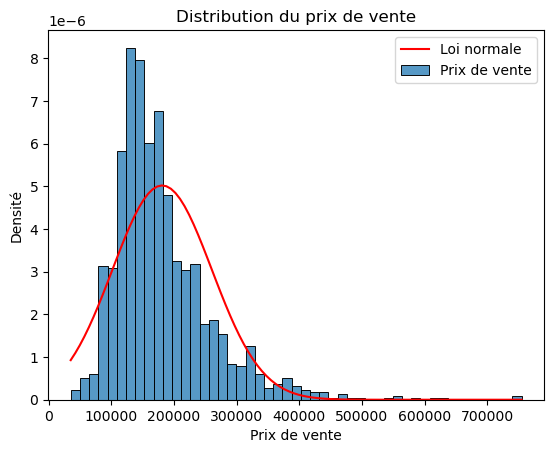

In [46]:
plot_hist(df['SalePrice'])

Vous devez obtenir une distribution des valeurs de `SalePrice` proches d'une distribution normale mais légèrement asymétrique. On peut alors appliquer une transformation logarithmique pour approcher d'une distribution normale symétrique.

**Effectuer cette transformation sur notre ensemble de données.**

In [47]:
#TODO
df['SalePrice'] = np.log(df['SalePrice'])

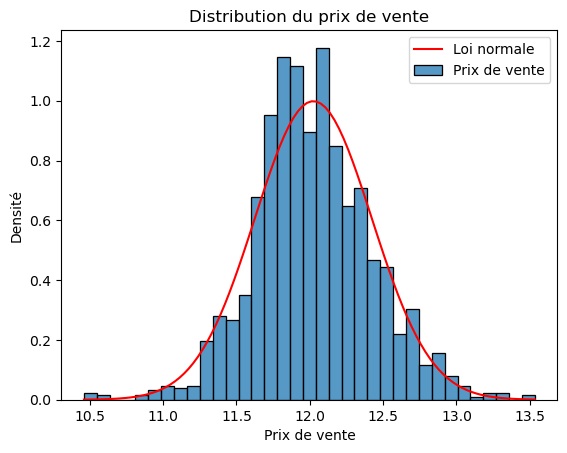

In [48]:
plot_hist(df['SalePrice'])

### 2.3 Détection des valeurs aberrantes

En pratique, la méthode de détection d'une valeur aberrante nécessite de se poser les questions suivantes:
- Quelles valeurs seraient incohérentes pour chaque colonne ?
- Quelles valeurs peuvent être problématiques pour l'utilisation de ces données ? Exemple: pour une régression linéaire, on préfère avoir des valeurs distribuées suivant une loi normale.

Avec ces éléments, on peut:
- Fixer des seuils de tolérance pour les valeurs aberrantes
- Utiliser des algorithmes de détection de valeurs aberrantes (ex: clustering, IRQ, [QTest](https://plotly.com/python/v3/outlier-test/), ...)

A noter que suivant les méthodes, les valeurs détectées comme aberrantes peuvent être différentes.

La méthode IRQ fait l'objet d'une partie bonus, en fin de ce notebook.

### 2.3.1 Question 7 (10 points)

Ici comme nous allons réaliser une régression linéaire, nous allons visuellement voir si certains points s'écartent franchement de la droite de régression.

On sait que l'on veut effectuer une régression linéaire pour prédire `SalePrice`. On peut donc visualiser les valeurs de chaque attribut en fonction de `SalePrice` pour détecter la présence de valeurs aberrantes.

**Implémenter la fonction `plot_line`. Elle doit permettre de visualiser la relation entre un attribut donné et `SalePrice`.**

In [49]:
def plot_line(attr):
    """
    Affiche la relation entre attr et SalePrice

    :param attr: attribut à comparer à SalePrice
    """
    sns.lmplot(x='SalePrice', y=attr, data=df)
    plt.title(f"Relation entre {attr} et SalePrice")
    plt.xlabel('Prix de vente')
    plt.ylabel(attr)
    plt.show()

**Afficher les relations de tous les attributs avec `SalePrice`. Peut-on y déceler des valeurs aberrantes ?**

On décèle plusieurs valeurs aberrantes pour MSSubClass et OverallCond, moyennement pour YearBuilt et YearRemodAdd, et moins pour LotArea, BsmtFinSF2 et TotalBsmtSF. Les valeurs aberrantes se remarquent car elles sont éloignées de la droite de tendance.


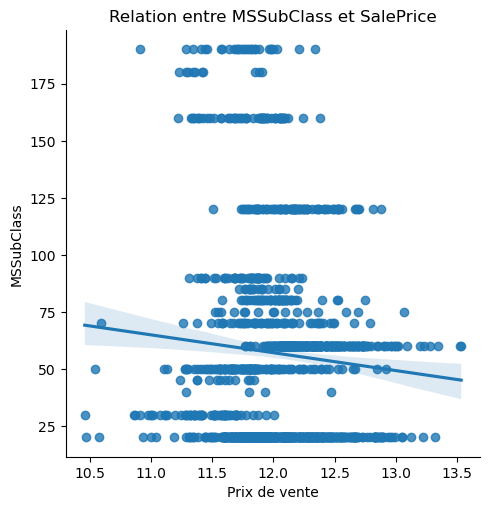

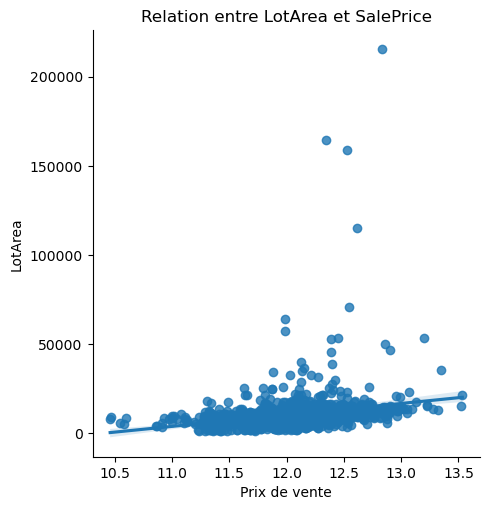

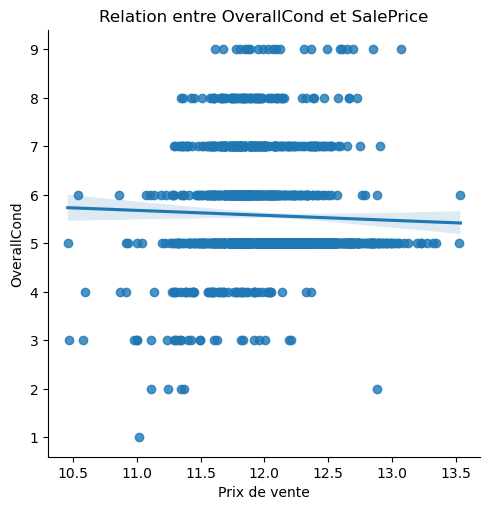

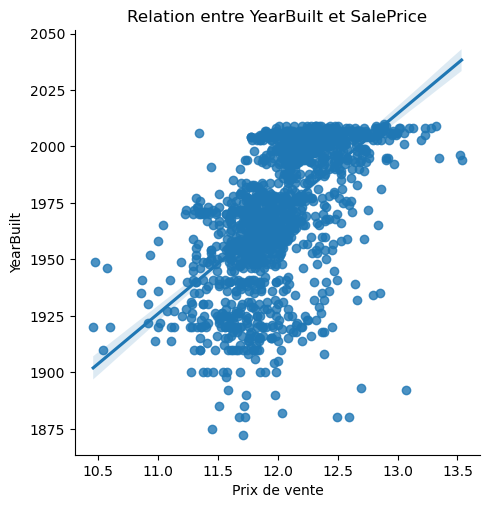

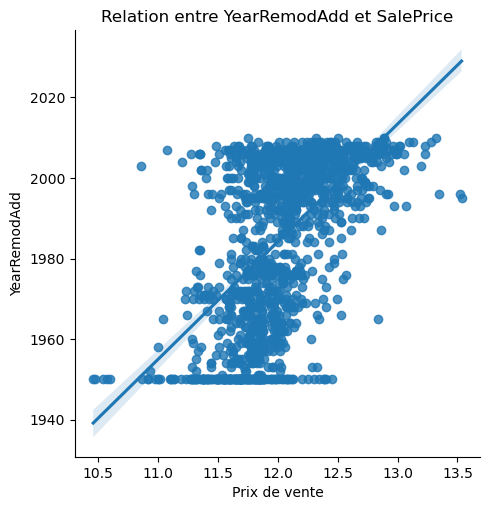

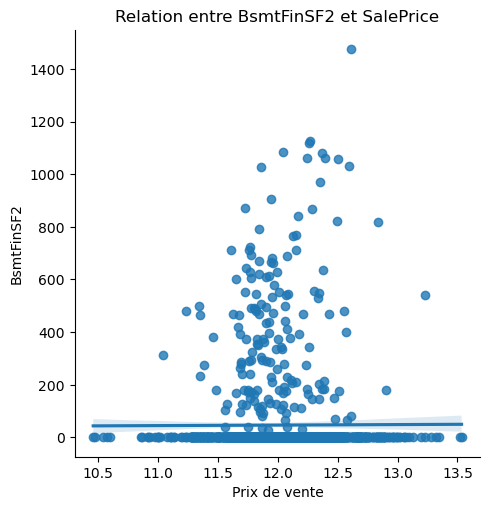

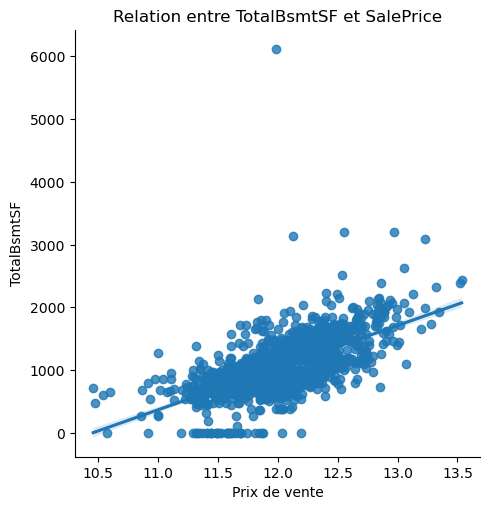

In [50]:
#TODO
print("On décèle plusieurs valeurs aberrantes pour MSSubClass et OverallCond, moyennement pour YearBuilt et YearRemodAdd, et moins pour LotArea, BsmtFinSF2 et TotalBsmtSF. Les valeurs aberrantes se remarquent car elles sont éloignées de la droite de tendance.")

for attr in df.select_dtypes(include=[np.number]).columns:
    if attr != 'SalePrice':
        plot_line(attr)

## 3. Transformation des données (10 points)

### 3.1 Encodage des attributs de type `object`

Les attributs de type `object` étant catégoriques (voire partie 1), on peut effectuer un `one hot encoding` de ces attributs. `Pandas` permet d'effectuer cela avec la fonction `get_dummies()`. Cela nous permettra d'obtenir un dataset contenant uniquement des attributs de type `int` ou `float`.


#### 3.1.1 Question 8 (5 points)

**Encodez les attributs de type `object` avec un `one hot encoding`**

In [51]:
#TODO
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)
df.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,12.247694,False,False,...,False,False,False,False,False,False,False,True,False,False
1,20,9600,8,1976,1976,0.0,1262.0,12.109011,False,False,...,False,False,False,True,False,False,False,False,False,False
2,60,11250,5,2001,2002,0.0,920.0,12.317167,False,False,...,False,False,False,False,False,False,False,True,False,False
3,70,9550,5,1915,1970,0.0,756.0,11.849398,False,False,...,False,False,False,False,False,False,False,False,True,False
4,60,14260,5,2000,2000,0.0,1145.0,12.429216,False,False,...,False,False,False,False,False,False,False,True,False,False


### 3.2 Normalisation des données

Pour faciliter l'entraînement du modèle, on peut normaliser les données. `sklearn` permet d'effectuer cela avec les fonctions suivantes :

*   `StandardScaler()` normalise les données en soustrayant la moyenne et en divisant par l'écart-type
*   `MinMaxScaler()` normalise les données en les ramenant entre 0 et 1.

Dans la suite de ce TP, nous utiliserons la fonction `StandardScaler()`.

In [52]:
# A utiliser dans la partie 6.2
mu_sale_price = df["SalePrice"].mean()
sigma_sale_price = df["SalePrice"].std()

#### 3.2.1 Question 9 (5 points)

**Implémenter la fonction `normalize`. Elle doit réaliser la normalisation des données.**

In [53]:
def normalize(dataset):
    """
    Normalise les données du dataset.

    :param dataset: ensemble des données
    :return:
      dataset traitée
    """
    scaler = StandardScaler()
    numeric_columns = dataset.select_dtypes(include=[np.number]).columns
    dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])
    return dataset

In [54]:
df = normalize(df)
df.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.066066,-0.215504,-0.511162,1.044791,0.895701,-0.293353,-0.447678,0.560068,False,False,...,False,False,False,False,False,False,False,True,False,False
1,-0.874430,-0.068656,2.194499,0.152334,-0.398557,-0.293353,0.475862,0.212764,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0.066066,0.142038,-0.511162,0.978683,0.847765,-0.293353,-0.302095,0.734046,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.301189,-0.075041,-0.511162,-1.863958,-0.686170,-0.293353,-0.675151,-0.437382,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0.066066,0.526395,-0.511162,0.945629,0.751894,-0.293353,0.209719,1.014651,False,False,...,False,False,False,False,False,False,False,True,False,False


## 4. Sélection des attributs corrélées (15 points)

### 4.1 Suppression des attributs corrélées

Pour améliorer la qualité de la prédiction, nous devons prendre en compte la corrélation entre attributs. L'objectif est donc de supprimer les attributs les plus fortement corrélées entre eux.

Pour ce faire, vous disposez des fonctions suivantes

* `corr()` de `Pandas` qui calcule la matrice de corrélation
* `heatmap()` de `seaborn` qui permet de visualiser la matrice de corrélation


#### 4.1.1 Question 10 (10 points)

**Implémenter la fonction `display_corr_matrix`. Elle doit permettre d'afficher la matrice de corrélation entre les différents attributs de nos données après normalisation des données.**

In [55]:
def display_corr_matrix(dataset):
    """
    Créer et affiche la matrice de corrélation des attributs liés au dataset.

    :param dataset: ensemble des données
    """
    sns.heatmap(dataset.corr(), cmap="coolwarm", linewidths=0.5)
    plt.title('Matrice de corrélation des attributs')
    plt.show()

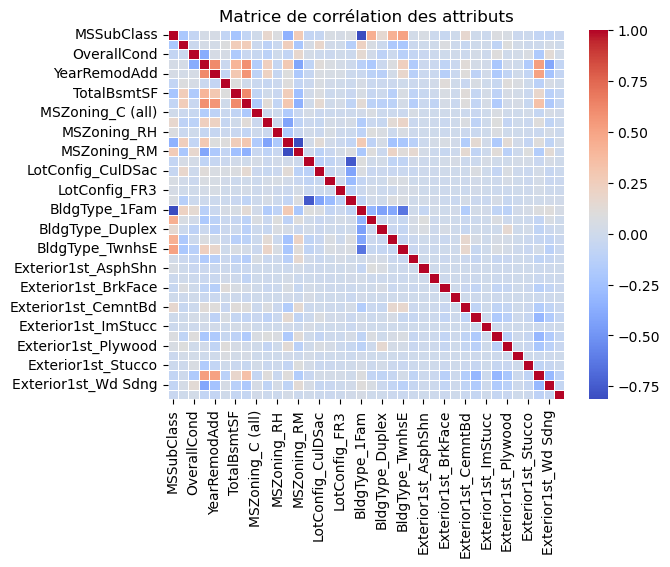

In [56]:
display_corr_matrix(df)

#### 4.1.2 Question 11 (5 points)

On peut alors choisir de supprimer les attributs qui sont fortement corrélées entre eux en définissant un seuil. Fixons ce seuil à 0.7.

**Quels sont les attributs fortement correlés selon le critère ci-dessus ? Supprimez ces attributs et affichez la nouvelle matrice de corrélation.**

Attributs fortement correlés : ['MSZoning_RM', 'LotConfig_Inside', 'BldgType_1Fam']


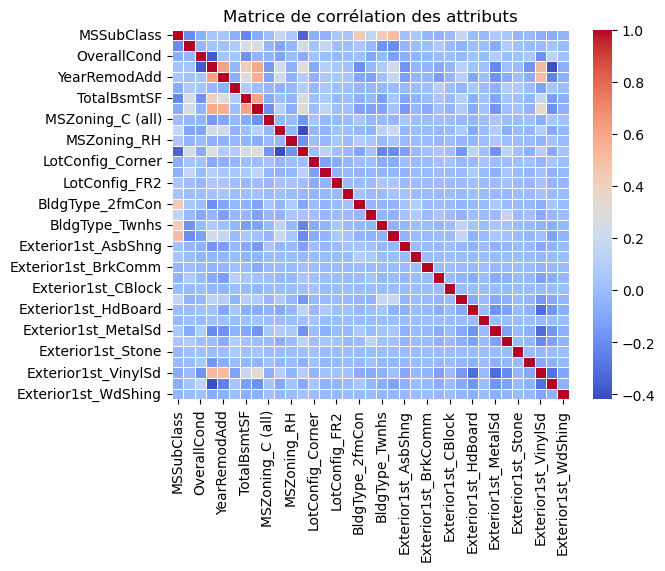

In [57]:
#TODO
corr_matrix = df.corr().abs()
upper_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_matrix.columns if any(upper_matrix[column] > 0.7)]
print(f"Attributs fortement correlés : {to_drop}")
display_corr_matrix(df.drop(columns=to_drop))

## 5. Récapitulatif des prétraitements

<img src=" 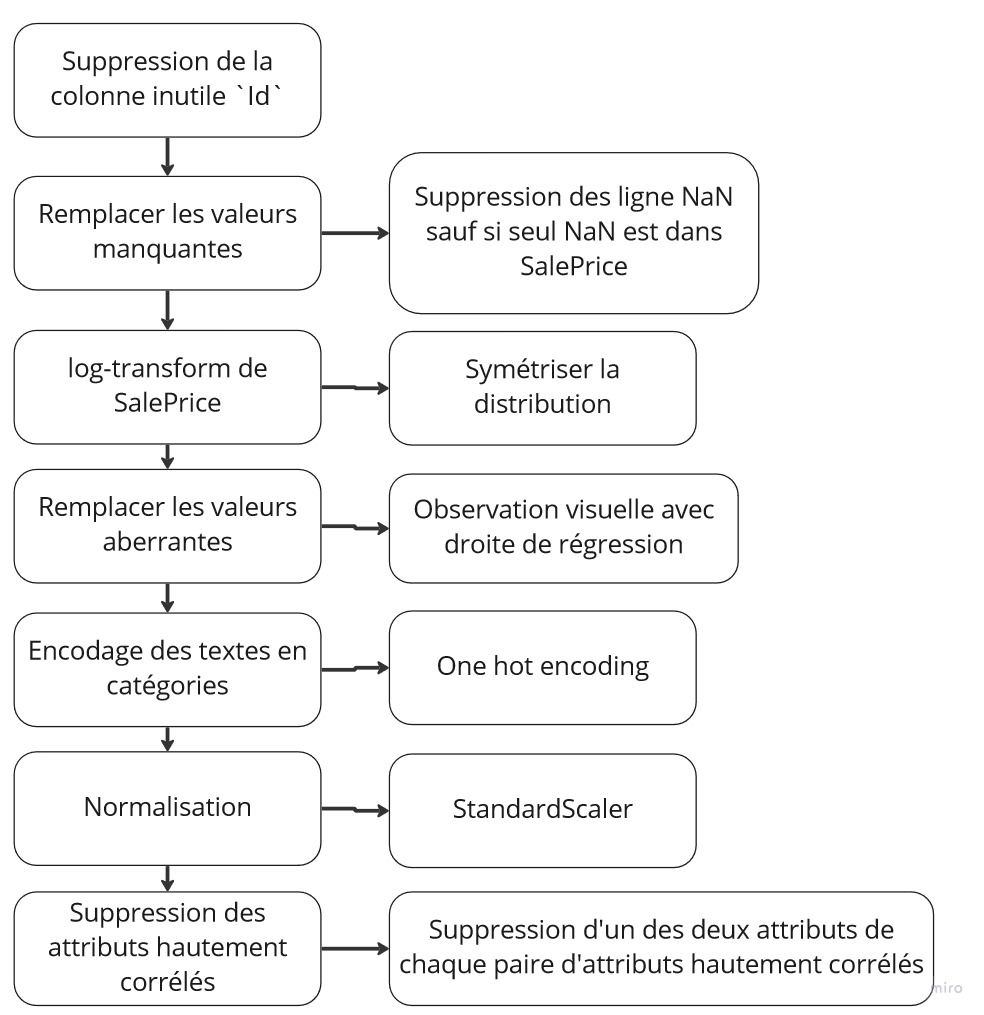" height="600px">

## 6. Entrainement d'un modèle de régression linéaire (30 points)

### 6.1 Rappel du concept

La régression linéaire consiste à trouver une fonction affine qui minimise la somme des carrés des erreurs. La fonction affine est définie par la formule suivante :
$$ f(x) = \beta_0 + \beta_1^T x $$
Nous tentons de trouver les paramètres $\beta_0$ et $\beta_1$ qui minimisent $\sum_{i=1}^n (f(x_i) - y_i)^2=||y-X\beta||^2$ où $X$ est la matrice des données fournies au modèle et $y$ le vecteur des `SalePrice`.

On veut trouver le minimum de cette fonction. On va utiliser `RidgeRegression` de `sklearn` pour trouver les paramètres $\beta_0$ et $\beta_1$. Ce module utilise la méthode des moindres carrés (`numpy.linalg.lstsq`) pour trouver les paramètres $\beta_0$ et $\beta_1$.

### 6.2 Application

#### 6.2.1 Question 12 (5 points)

Après avoir effectué le prétraitement, on peut commencer par séparer les données en un ensemble d'entraînement et un ensemble de test. Pour cela, les 1460 premières lignes contiennent les données d'entrainement. On peut ainsi séparer les données en deux ensembles.

**Compléter la structure suivante afin de diviser les données en deux sous-ensembles.**

In [58]:
data_train = df.iloc[:1460]
data_pred = df.iloc[1460:].copy(deep=True)

#### 6.2.2 Question 13 (7.5 points)

Une fois cette scission faite, on peut utiliser `RidgeRegression` pour effectuer la régression linéaire avec pénalisation de la norme L2.

**Compléter la fonction `ridge_regression`. Elle doit implémenter l'ensemble de la régression.**

*Pour cette question, vous devez retourner les coefficients de la regression linéaire. De plus, ce fonction doit modifier le paramètre `data_pred` en y ajoutant les valeurs prédites. Il est aussi nécéssaire de prendre en compte certaines modifications effectuées lors de la transformation des données*

In [59]:
def ridge_regression(data_train, data_pred):
    """
    Réaliser la prédiction selon la régression de Rigde.

    :param data_train: données d'entrainement
    :param data_pred: données de prédiction
    :return:
      coefficients de la régression
    """
    # data_pred["y"] = #TODO

    X_train = data_train.drop(columns='SalePrice')
    y_train = data_train['SalePrice']

    if 'y' in data_pred.columns:
        data_pred = data_pred.drop(columns='y')

    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)

    data_pred["y"] = ridge_model.predict(data_pred.drop(columns='SalePrice'))

    coefficients = ridge_model.coef_
    
    return ridge_model, coefficients

In [60]:
model, coeffs = ridge_regression(data_train, data_pred)
data_pred["y"]

1460   -0.702642
1461   -0.134965
1462    0.532268
1463    0.617082
1464   -0.042912
          ...   
2914   -1.028635
2915   -0.862369
2916    0.218672
2917    0.512202
2918    0.336742
Name: y, Length: 1453, dtype: float64

#### 6.2.3 Question 14 (5 points)

**Comparer la distribution des données prédites avec celles d'entrainement.**

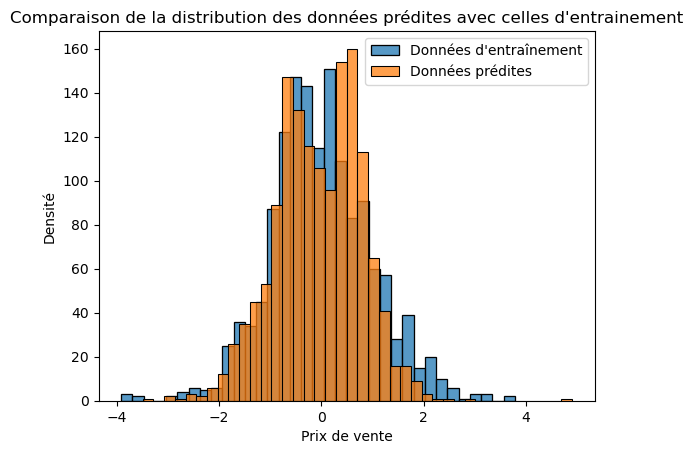

In [61]:
#TODO
sns.histplot(data_train['SalePrice'], label="Données d'entraînement")
sns.histplot(data_pred['y'], label="Données prédites")
plt.title("Comparaison de la distribution des données prédites avec celles d'entrainement")
plt.xlabel("Prix de vente")
plt.ylabel("Densité")
plt.legend()
plt.show()

### 6.3. Sélection des attributs importants
#### 6.3.1 Question 15 (5 points)

Une fois la prédiction obtenue, on peut maintenant mesurer l'importance de chaque attribut dans la prédicition en traçant les coefficients de la régression linéaire.

**Quels sont les dix attributs ayant le plus d'impact dans la prédiction ?**


In [62]:
#TODO
X_train = data_train.drop(columns='SalePrice')
coeffs_series = pd.Series(coeffs, index=X_train.columns)
top_10_features = coeffs_series.abs().sort_values(ascending=False).head(10)
print(f"Les 10 attributs ayant le plus d'impact dans la prédiction : \n{top_10_features}")

Les 10 attributs ayant le plus d'impact dans la prédiction : 
BldgType_1Fam          1.065444
MSZoning_C (all)       0.849375
BldgType_Twnhs         0.603945
Exterior1st_BrkComm    0.587120
Exterior1st_Stone      0.567792
MSSubClass             0.484305
BldgType_2fmCon        0.469914
TotalBsmtSF            0.450391
Exterior1st_BrkFace    0.359633
MSZoning_FV            0.346072
dtype: float64


#### 6.3.2 Question 16 (7.5 points)

Cette dernière méthode n'est pas nécessairement une bonne mesure de l'importance d'un attribut. On peut utiliser la méthode SHAP (SHapley Additive exPlanations) pour effectuer la sélection des attributs.

**Les dix attributs ayant le plus d'impact dans la prédiction pour cette mesure sont-ils les mêmes que ceux de la question précédente ? Donnez une interprétation comparative de ces deux résultats**


In [63]:
#TODO
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_train)
shap_importance = np.abs(shap_values).mean(axis=0)
shap_importance_series = pd.Series(shap_importance, index=X_train.columns)
top_10_features_shap = shap_importance_series.sort_values(ascending=False).head(10)
print(f"Les 10 attributs ayant le plus d'impact dans la prédiction selon SHAP : \n{top_10_features_shap}")

print("\nRidge : reflète davantage la structure globale du modèle, comme un modèle linéaire. Les variables catégoriques, telles que MSZoning et BldgType, sont surreprésentées, ce qui suggère un effet direct et global sur les prédictions, en raison de leur rôle dans la structuration du modèle.")
print("SHAP : analyse plus détaillée et locale. Elles mettent l'accent sur des variables continues comme YearBuilt, TotalBsmtSF, et LotArea, montrant un impact plus spécifique sur chaque prédiction, contrairement à l'effet global observé dans la première liste.")
print("-> La première méthode privilégie les effets globaux des variables, tandis que SHAP révèle l'impact individuel et contextuel.")

Les 10 attributs ayant le plus d'impact dans la prédiction selon SHAP : 
MSSubClass             0.356169
TotalBsmtSF            0.329548
BldgType_1Fam          0.289567
YearBuilt               0.28581
YearRemodAdd           0.181302
OverallCond            0.094761
MSZoning_RL            0.083324
Exterior1st_HdBoard    0.056149
BldgType_Twnhs         0.034839
LotArea                0.034123
dtype: object

Ridge : reflète davantage la structure globale du modèle, comme un modèle linéaire. Les variables catégoriques, telles que MSZoning et BldgType, sont surreprésentées, ce qui suggère un effet direct et global sur les prédictions, en raison de leur rôle dans la structuration du modèle.
SHAP : analyse plus détaillée et locale. Elles mettent l'accent sur des variables continues comme YearBuilt, TotalBsmtSF, et LotArea, montrant un impact plus spécifique sur chaque prédiction, contrairement à l'effet global observé dans la première liste.
-> La première méthode privilégie les effets globaux

## 7. Méthode des écarts interquartiles ou IRQ (10 points)

On peut également détecter les valeurs aberrantes en affichant un boxplot de chaque colonne. `Plotly` considère les valeurs aberrantes comme des outliers si elles sont situées en dehors de l'intervalle [Q1 - α * IQR, Q3 + α * IQR] où
* Q1 et Q3 sont les quantiles 25% et 75%,
* IQR l'intervalle interquartile (Q3 - Q1)
* α le facteur d'ajustement.

On exclut `SalePrice` car les seules valeurs manquantes de cet attribut sont celles du dataset de test.

### 7.1 Question 17 (5 points)

**A quelle valeur fixer le facteur d'ajustement α ? Combien y-a-t-il alors de données aberrantes pour chaque attribut ?**

In [64]:
#TODO
alpha = 1.5
outliers_count = {}
for column in df.select_dtypes(include=[np.number]).columns:
    if column != 'SalePrice':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - alpha * IQR
        upper_bound = Q3 + alpha * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_count[column] = outliers.shape[0]
for column, count in outliers_count.items():
    print(f"{column}: {count} valeurs aberrantes")

print("\n1.5 est souvent utilisée pour détecter les valeurs aberrantes dans un ensemble de données. Cela signifie que les valeurs qui se trouvent à plus de 1.5 fois l'écart interquartile (IQR) au-dessus ou en dessous des bornes sont considérées comme des valeurs aberrantes.")

MSSubClass: 207 valeurs aberrantes
LotArea: 125 valeurs aberrantes
OverallCond: 250 valeurs aberrantes
YearBuilt: 9 valeurs aberrantes
YearRemodAdd: 0 valeurs aberrantes
BsmtFinSF2: 347 valeurs aberrantes
TotalBsmtSF: 119 valeurs aberrantes

1.5 est souvent utilisée pour détecter les valeurs aberrantes dans un ensemble de données. Cela signifie que les valeurs qui se trouvent à plus de 1.5 fois l'écart interquartile (IQR) au-dessus ou en dessous des bornes sont considérées comme des valeurs aberrantes.


### 7.2 Question 18 (5 points)

**Traitez les données aberrantes identifiées à la question précédantes. Quel traitement appliquer ?**

In [65]:
for column in df.select_dtypes(include=[np.number]).columns:
    if column != 'SalePrice':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - alpha * IQR
        upper_bound = Q3 + alpha * IQR
        median_value = df[column].median()
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])

print("Remplacer ces valeurs aberrantes par des valeurs plus représentatives, comme la médiane ou la moyenne de l'attribut, dans notre cas nous utilisons la médiane.")
df.head()

Remplacer ces valeurs aberrantes par des valeurs plus représentatives, comme la médiane ou la moyenne de l'attribut, dans notre cas nous utilisons la médiane.


,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.066066,-0.215504,-0.511162,1.044791,0.895701,-0.293353,-0.447678,0.560068,False,False,...,False,False,False,False,False,False,False,True,False,False
1,-0.874430,-0.068656,-0.511162,0.152334,-0.398557,-0.293353,0.475862,0.212764,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0.066066,0.142038,-0.511162,0.978683,0.847765,-0.293353,-0.302095,0.734046,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.301189,-0.075041,-0.511162,-1.863958,-0.686170,-0.293353,-0.675151,-0.437382,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0.066066,0.526395,-0.511162,0.945629,0.751894,-0.293353,0.209719,1.014651,False,False,...,False,False,False,False,False,False,False,True,False,False
